## Эксперимент на man & logo

In [1]:
from src import HybridMetaheuristic


model = HybridMetaheuristic("pic/man.png", "pic/logo.png")

/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: divide by zero encountered in log
  items.append(i * np.log(i))
/home/evgeny/Documents/vkr/src/utilities.py:108: RuntimeWarning: invalid value encountered in scalar multiply
  items.append(i * np.log(i))


In [2]:
# Запускаю алгоритм гибридной метаэвристики
model.evolution()

  0%|                                                   | 0/100 [00:00<?, ?it/s]

Best score: 2.6270908518752614


100%|██████████████████████████████████████| 100/100 [4:07:44<00:00, 148.65s/it]


In [3]:
# Лучший параметр Светлячка
model.best_firefly_value

14.136616128958062

In [4]:
from src import Watermark

# Пробую погрузить ЦВЗ с полученными параметрами
watermark = Watermark(
    model.best_candidate_indexes, 
    model.embedded_image_bin, 
    model.image_matrix, 
    model.best_firefly_value
)

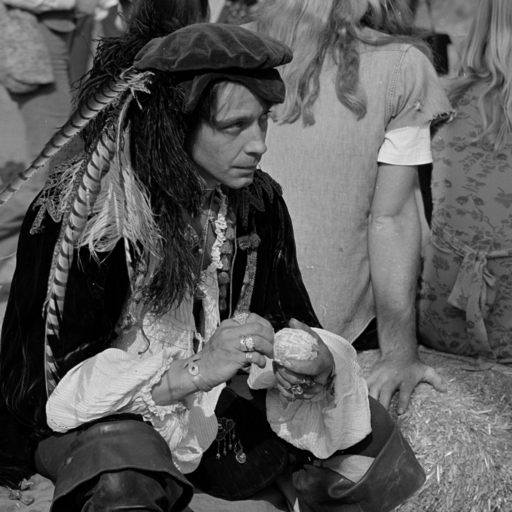

In [5]:
# Исходное изображение без ЦВЗ
model.image

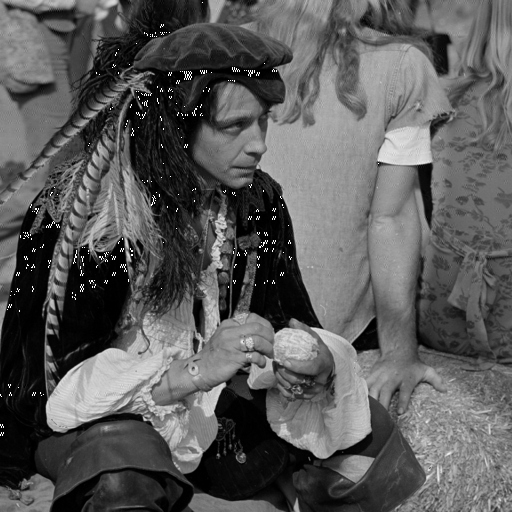

In [6]:
# Полученное изображение с ЦВЗ
watermark.watermark

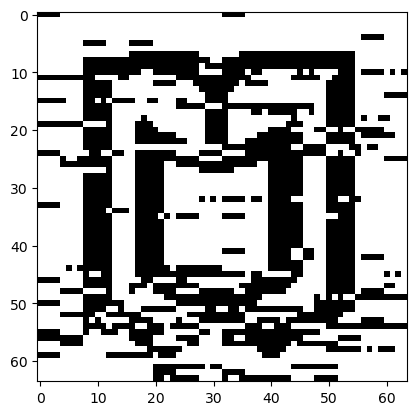

In [7]:
import matplotlib.pyplot as plt

plt.imshow(watermark.extracted_image_bin, cmap=plt.cm.gray)

In [8]:
from src import Attack, Utilities

attacked = Attack(watermark.watermark)

In [9]:
# медианный фильтр

mf = Utilities.extracting(Utilities.matrix_to_image(attacked.mf), watermark.secret_key)
Utilities.get_normal_correlation(mf, watermark.embedded_image_bin)

0.6176470588235294

In [10]:
# фильтр Гаусса

gs3 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs3), watermark.secret_key)
Utilities.get_normal_correlation(gs3, watermark.embedded_image_bin)

0.9256360078277887

In [11]:
# фильтр Гаусса, kernel=5

gs5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gs5), watermark.secret_key)
Utilities.get_normal_correlation(gs5, watermark.embedded_image_bin)

0.9256360078277887

In [12]:
# усредненная фильтрация, kernel=3

avr = Utilities.extracting(Utilities.matrix_to_image(attacked.avr), watermark.secret_key)
Utilities.get_normal_correlation(avr, watermark.embedded_image_bin)

0.5704187058183795

In [13]:
# Фильтр увеличивает контраст соседних пикселей

shr = Utilities.extracting(Utilities.matrix_to_image(attacked.shr), watermark.secret_key)
Utilities.get_normal_correlation(shr, watermark.embedded_image_bin)

0.9256068911511355

In [14]:
# Изменение контрастности изображения с использованием гистограмм

his = Utilities.extracting(Utilities.matrix_to_image(attacked.his), watermark.secret_key)
Utilities.get_normal_correlation(his, watermark.embedded_image_bin)

0.9259694477085781

In [15]:
# Искажения яркости пикселей с параметром gamma=0.2

gc2 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc2), watermark.secret_key)
Utilities.get_normal_correlation(gc2, watermark.embedded_image_bin)

0.8204553938036581

In [16]:
# Искажения яркости пикселей с параметром gamma=0.4

gc4 = Utilities.extracting(Utilities.matrix_to_image(attacked.gc4), watermark.secret_key)
Utilities.get_normal_correlation(gc4, watermark.embedded_image_bin)

0.9105531581012162

In [17]:
# Гауссовый шум с параметром 0,001

gn1 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn1), watermark.secret_key)
Utilities.get_normal_correlation(gn1, watermark.embedded_image_bin)

0.9252446183953034

In [18]:
# Гауссовый шум с параметром 0,005

gn5 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn5), watermark.secret_key)
Utilities.get_normal_correlation(gn5, watermark.embedded_image_bin)

0.9242245779348253

In [19]:
# Гауссовый шум с параметром 0,009

gn9 = Utilities.extracting(Utilities.matrix_to_image(attacked.gn9), watermark.secret_key)
Utilities.get_normal_correlation(gn9, watermark.embedded_image_bin)

0.9211045364891519

In [20]:
# Атака соль/перец с параметром p=0.01

sp1 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp1), watermark.secret_key)
Utilities.get_normal_correlation(sp1, watermark.embedded_image_bin)

0.8587689713322091

In [21]:
# Атака соль/перец с параметром p=0.02

sp2 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp2), watermark.secret_key)
Utilities.get_normal_correlation(sp2, watermark.embedded_image_bin)

0.8081774684645499

In [22]:
# Атака соль/перец с параметром p=0.03

sp3 = Utilities.extracting(Utilities.matrix_to_image(attacked.sp3), watermark.secret_key)
Utilities.get_normal_correlation(sp3, watermark.embedded_image_bin)

0.7801324503311259

In [23]:
# В заданной области затемняет 1/4 пикселей, с параметром center

crp_ct = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_ct), watermark.secret_key)
Utilities.get_normal_correlation(crp_ct, watermark.embedded_image_bin)

0.8096930533117932

In [24]:
# В заданной области затемняет 1/4 пикселей, с параметром top-left

crp_tl = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_tl), watermark.secret_key)
Utilities.get_normal_correlation(crp_tl, watermark.embedded_image_bin)

0.7723187537447573

In [25]:
# В заданной области затемняет 1/4 пикселей, с параметром bottom-right

crp_br = Utilities.extracting(Utilities.matrix_to_image(attacked.crp_br), watermark.secret_key)
Utilities.get_normal_correlation(crp_br, watermark.embedded_image_bin)

0.9241779497098646

In [26]:
# Растягивает изображения и возвращает к изначальным размерам 

scl_1024 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_1024), watermark.secret_key)
Utilities.get_normal_correlation(scl_1024, watermark.embedded_image_bin)

0.9130090945037564

In [27]:
# Сжимает изображения и возвращает к изначальным размерам 

scl_256 = Utilities.extracting(Utilities.matrix_to_image(attacked.scl_256), watermark.secret_key)
Utilities.get_normal_correlation(scl_256, watermark.embedded_image_bin)

0.6834071885770556

In [28]:
# Вращает изображение против часовой стрелки на заданный угол, 5 градусов

rt5 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt5), watermark.secret_key)
Utilities.get_normal_correlation(rt5, watermark.embedded_image_bin)

0.6947459834997829

In [29]:
# Вращает изображение против часовой стрелки на заданный угол, 45 градусов

rt45 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt45), watermark.secret_key)
Utilities.get_normal_correlation(rt45, watermark.embedded_image_bin)

0.685497961560862

In [30]:
# Вращает изображение против часовой стрелки на заданный угол, 90 градусов

rt90 = Utilities.extracting(Utilities.matrix_to_image(attacked.rt90), watermark.secret_key)
Utilities.get_normal_correlation(rt90, watermark.embedded_image_bin)

0.673420164013507

In [31]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 70

com70 = Utilities.extracting(Utilities.matrix_to_image(attacked.com70), watermark.secret_key)
Utilities.get_normal_correlation(com70, watermark.embedded_image_bin)

0.9256360078277887

In [32]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 80

com80 = Utilities.extracting(Utilities.matrix_to_image(attacked.com80), watermark.secret_key)
Utilities.get_normal_correlation(com80, watermark.embedded_image_bin)

0.9256360078277887

In [33]:
# Применяет сжатие JPEG с заданным параметром качества, с параметром 90

com90 = Utilities.extracting(Utilities.matrix_to_image(attacked.com90), watermark.secret_key)
Utilities.get_normal_correlation(com90, watermark.embedded_image_bin)

0.9256360078277887